In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5175 - accuracy: 0.4450 - val_loss: 1.2599 - val_accuracy: 0.5442
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1551 - accuracy: 0.5913 - val_loss: 1.0650 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0213 - accuracy: 0.6401 - val_loss: 1.0349 - val_accuracy: 0.6377
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9253 - accuracy: 0.6775 - val_loss: 0.9746 - val_accuracy: 0.6586
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8555 - accuracy: 0.7010 - val_loss: 0.9228 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7948 - accuracy: 0.7224 - val_loss: 0.8973 - val_accuracy: 0.6909
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7482 - accuracy: 0.7385 - val_loss: 0.8576 -

###Increasing Accuracy


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Build the CNN model with increased complexity
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))  # Add dropout to prevent overfitting
model.add(layers.Dense(10, activation='softmax'))

# Learning Rate Adjustment
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 5:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(0.1 * (5 - epoch))

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with a different optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=20,
          validation_data=(datagen.flow(test_images, test_labels)),
          callbacks=[lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(datagen.flow(test_images, test_labels))
print(f'Test accuracy: {test_acc}')


Epoch 1/20
1563/1563 [==============================] - 52s 31ms/step - loss: 1.5027 - accuracy: 0.4664 - val_loss: 2.0020 - val_accuracy: 0.3557 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1424 - accuracy: 0.5962 - val_loss: 0.9984 - val_accuracy: 0.6426 - lr: 0.0010
Epoch 3/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0136 - accuracy: 0.6460 - val_loss: 1.1493 - val_accuracy: 0.6009 - lr: 0.0010
Epoch 4/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9297 - accuracy: 0.6781 - val_loss: 1.0021 - val_accuracy: 0.6465 - lr: 0.0010
Epoch 5/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8575 - accuracy: 0.7046 - val_loss: 1.3421 - val_accuracy: 0.5577 - lr: 0.0010
Epoch 6/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8158 - accuracy: 0.7176 - val_loss: 0.9873 - val_accuracy: 0.6561 - lr: 0.0010
Epoch 7/20
1563/1563 [========================

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

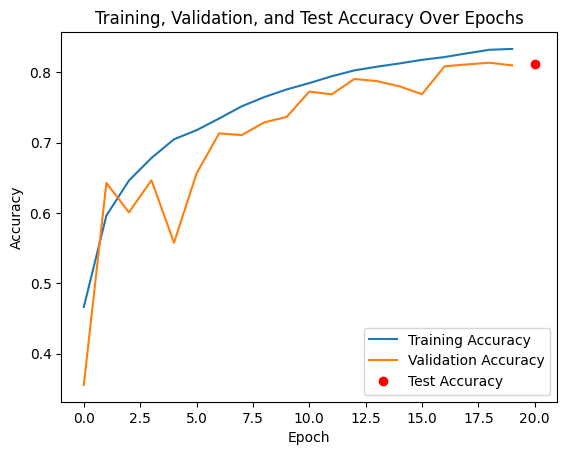

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(20, test_acc, 'ro', label='Test Accuracy')  # 20 is the final epoch
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy Over Epochs')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np

# Read the new image
new_image = cv2.imread('/content/car.jpg')
new_image = cv2.resize(new_image, (32, 32))  # Resize to match the model's input size
new_image = new_image / 255.0  # Normalize pixel values

# Reshape the image to match the model's input shape
new_image = np.reshape(new_image, (1, 32, 32, 3))

# Make a prediction
predictions = model.predict(new_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the class name (CIFAR-10 class names)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
predicted_class = class_names[predicted_class_index]

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 19ms/step
Predicted class: automobile


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving horse.jpg to horse.jpg


In [ ]:
# Read the uploaded image
for filename in uploaded.keys():
    new_image = cv2.imread(filename)
    new_image = cv2.resize(new_image, (32, 32))  # Resize to match the model's input size
    new_image = new_image / 255.0  # Normalize pixel values

    # Reshape the image to match the model's input shape
    new_image = np.reshape(new_image, (1, 32, 32, 3))

    # Make a prediction
    predictions = model.predict(new_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Map the index to the class name (CIFAR-10 class names)
    class_names = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]
    predicted_class = class_names[predicted_class_index]

    print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 18ms/step
Predicted class: horse


[Maths behind the above thing](https://chat.openai.com/share/a1c35c20-db4f-4ef2-b596-301bed5a98d8)

[Improving accuracy](https://chat.openai.com/share/d0da16e2-9ddf-4011-ba94-721fb05c9264)

[Accuracy - How to identify](https://chat.openai.com/share/bb2798fa-e0c0-4b4f-bebe-f57ded7959fb)

[Explanation of the model](https://chat.openai.com/share/71487b70-c105-45b2-8771-38db92a828f9)

[More explanation](https://chat.openai.com/share/423892fa-15b8-44ec-9416-9baa17e21a1a)

[What is CNN Model](https://chat.openai.com/share/df4928b4-cc57-4649-b193-b023df2ed2f1)